In [8]:
import matplotlib.pyplot as plt
import json
from collections import Counter
import numpy

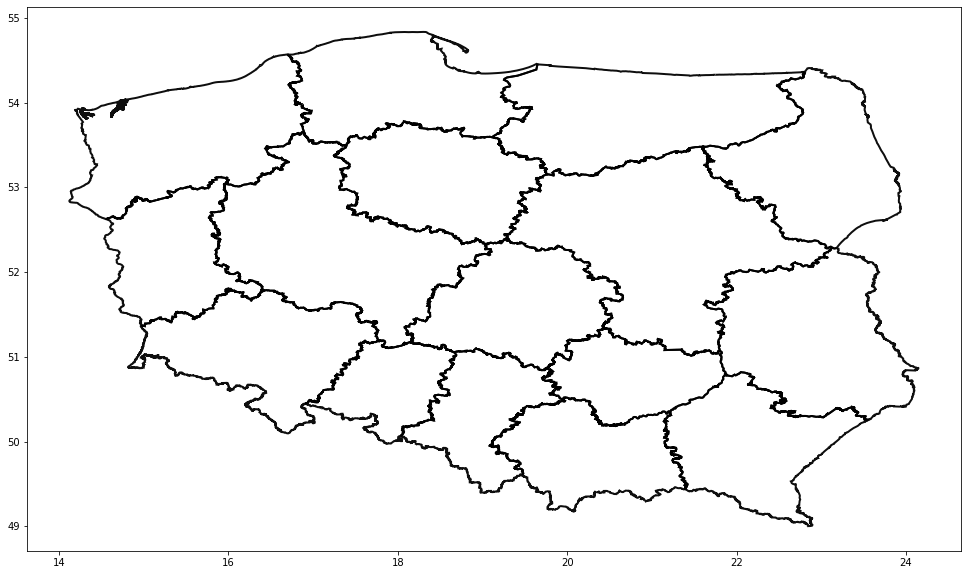

In [9]:
from descartes import PolygonPatch

geojson = {}
with open("gadm36_POL_1.json", "r") as f:
    geojson = json.load(f)
fig = plt.figure(figsize=(20,10)) 
ax = fig.gca() 
for poly in geojson['geometries']:
    ax.add_patch(PolygonPatch(poly, alpha=15, zorder=10, fill=False, lw=2))
    ax.axis('scaled')
plt.show()

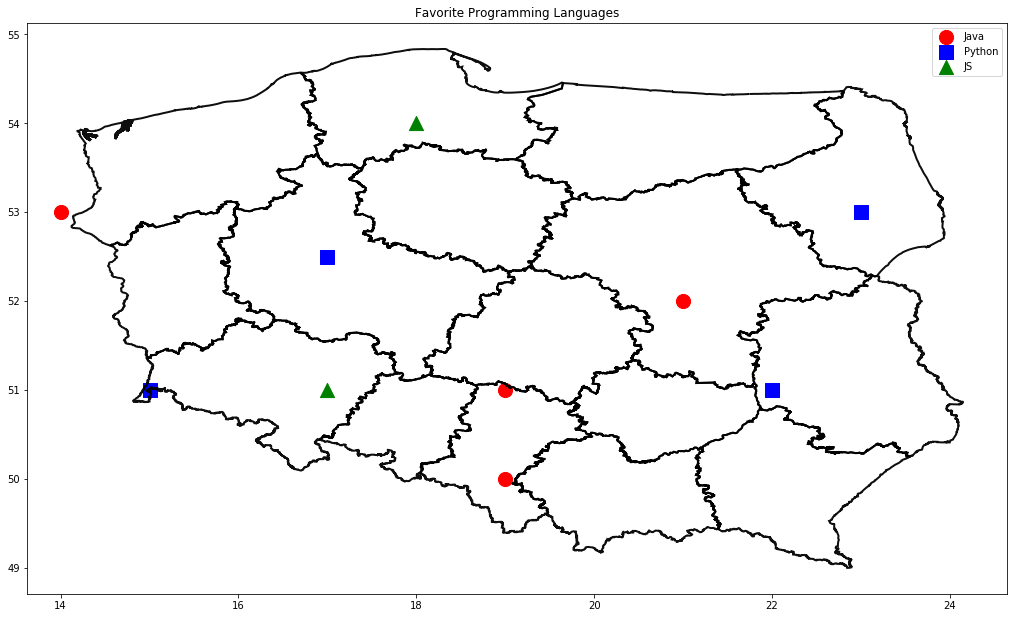

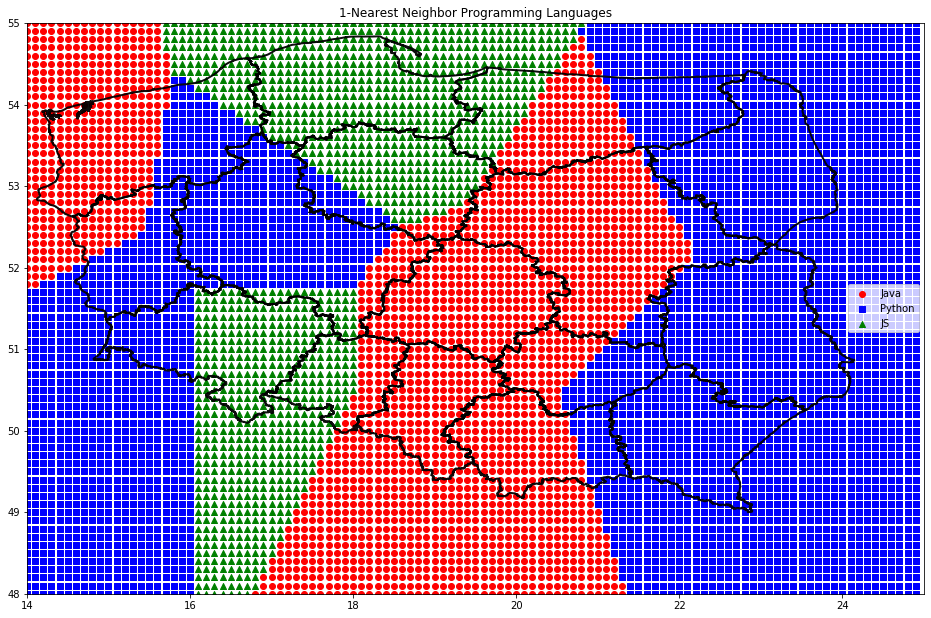

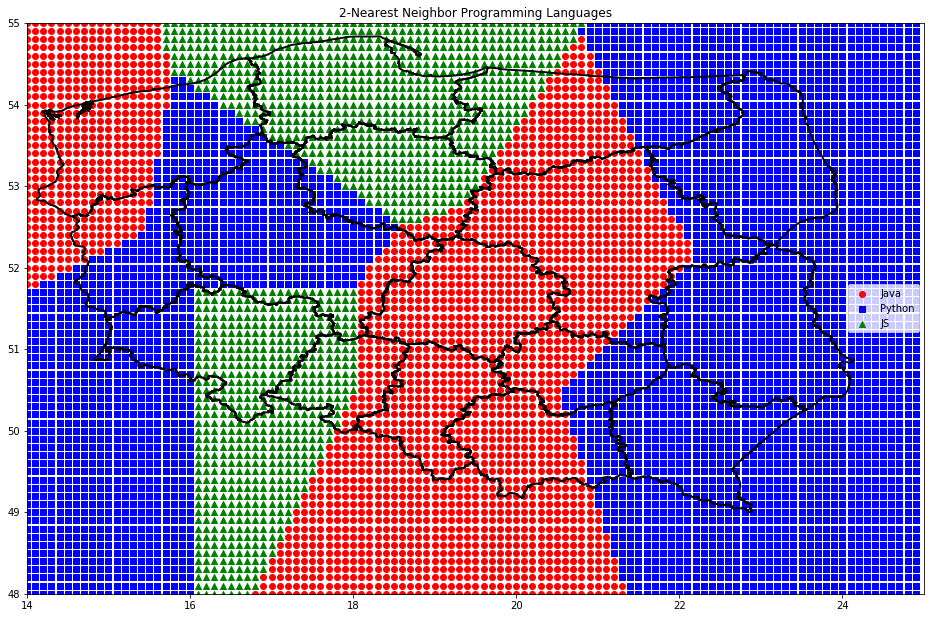

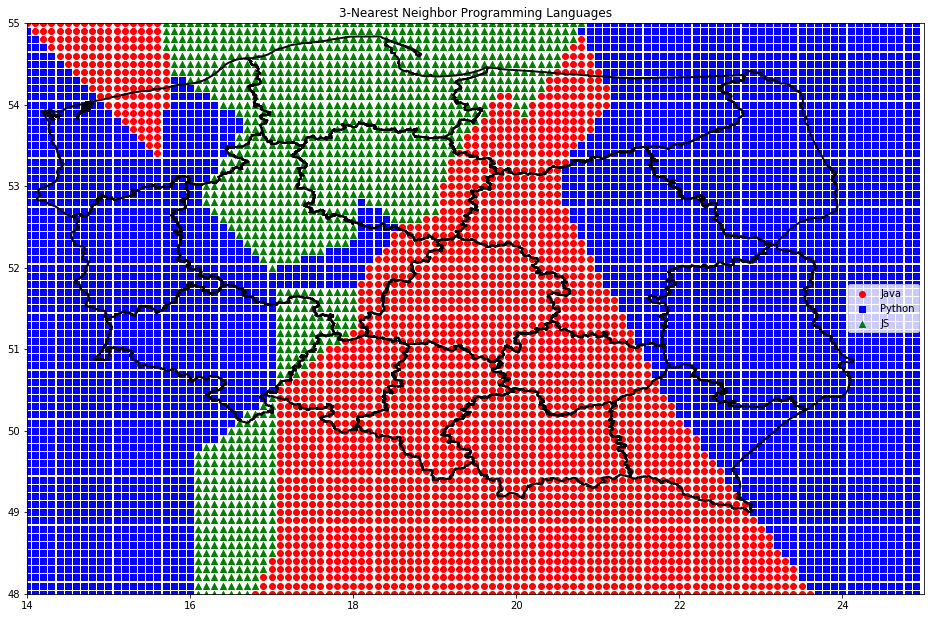

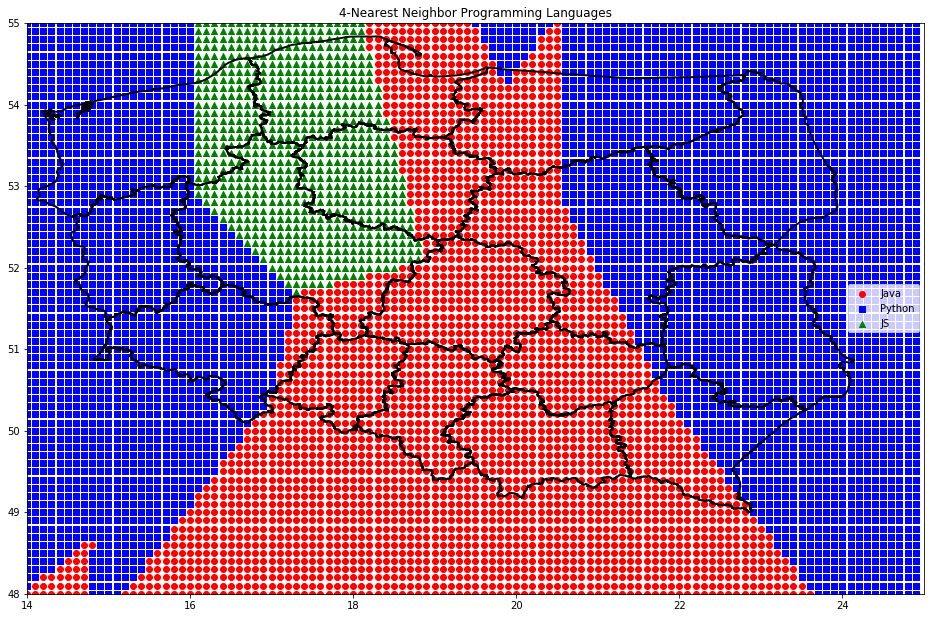

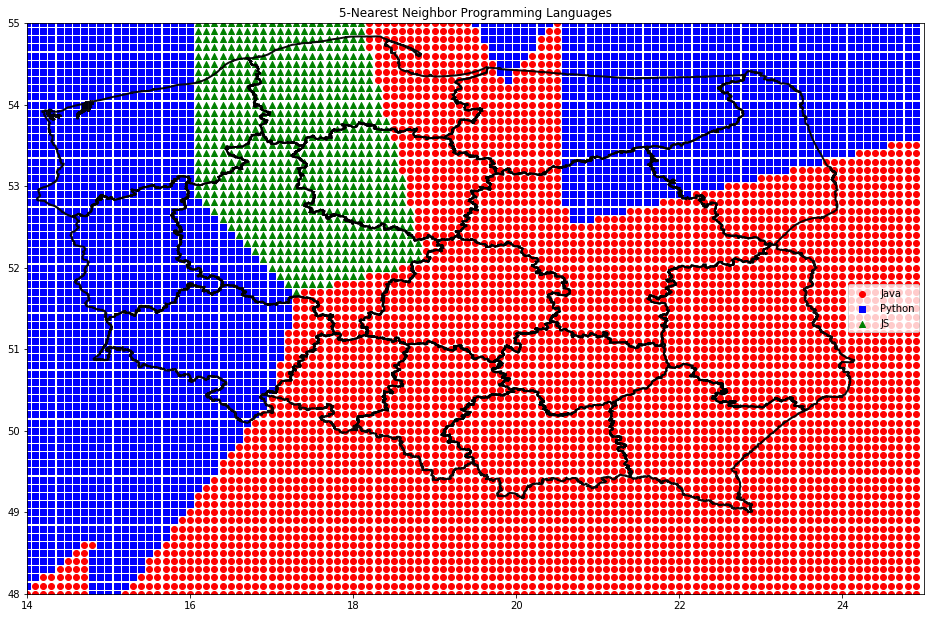

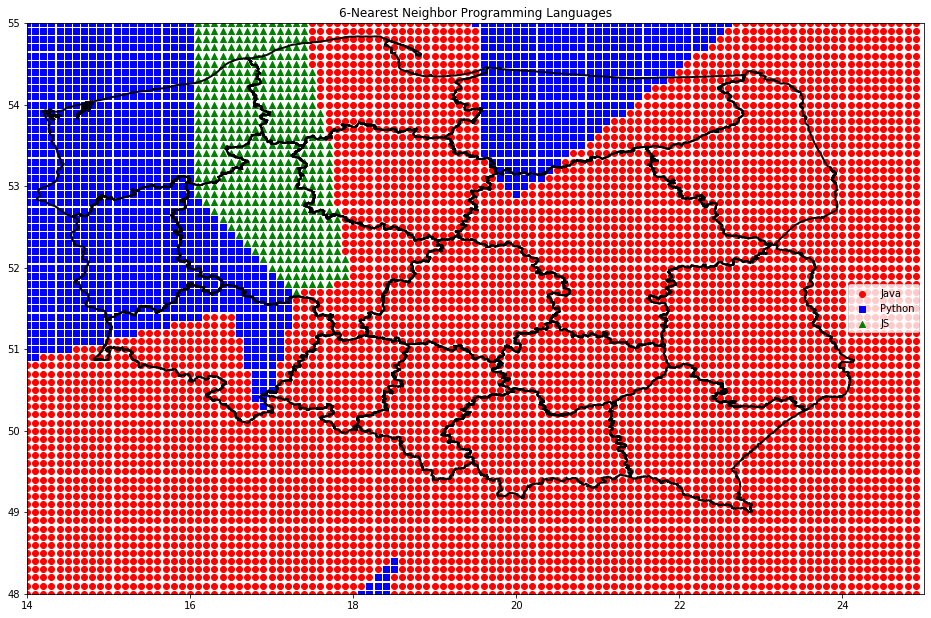

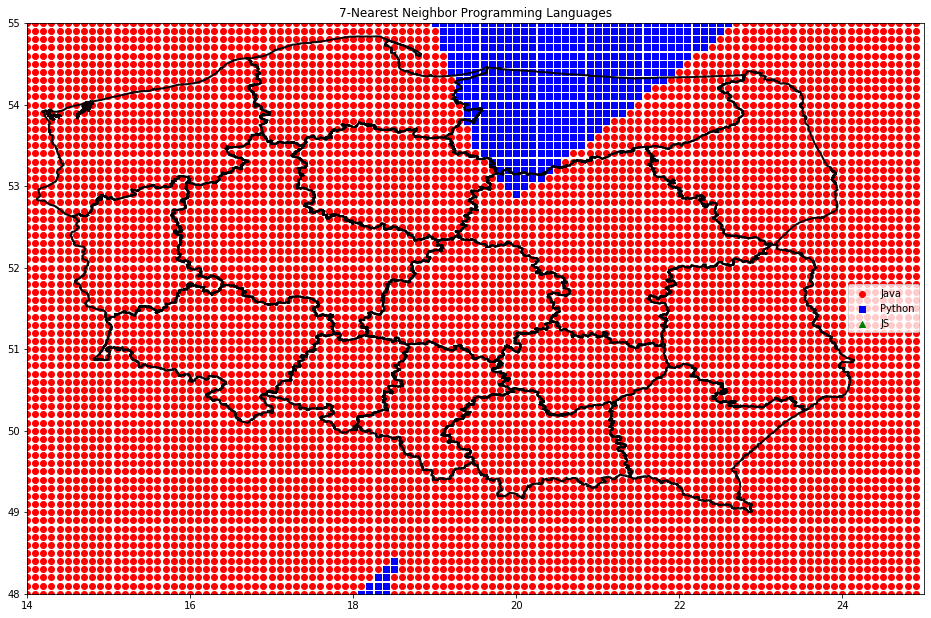

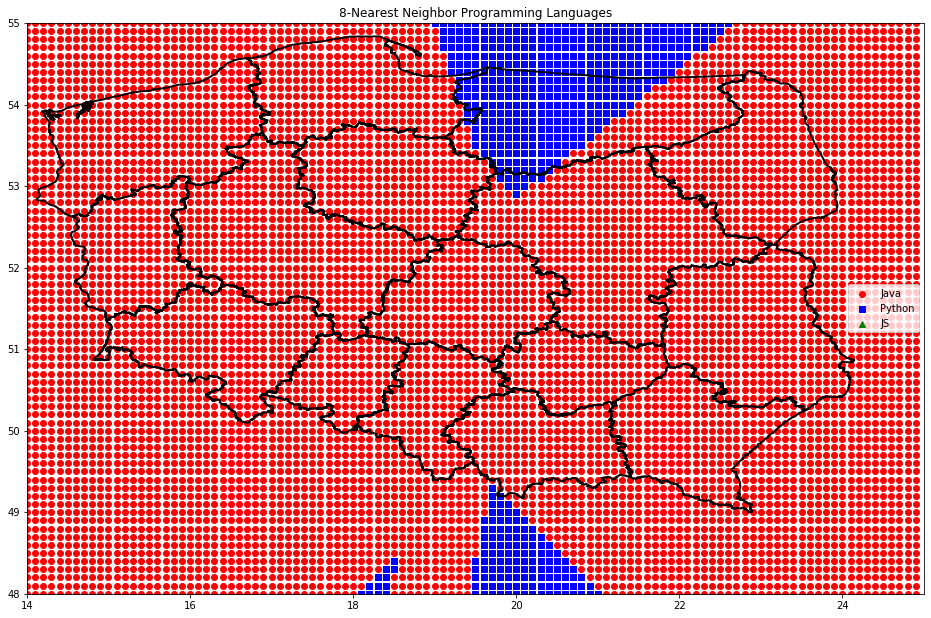

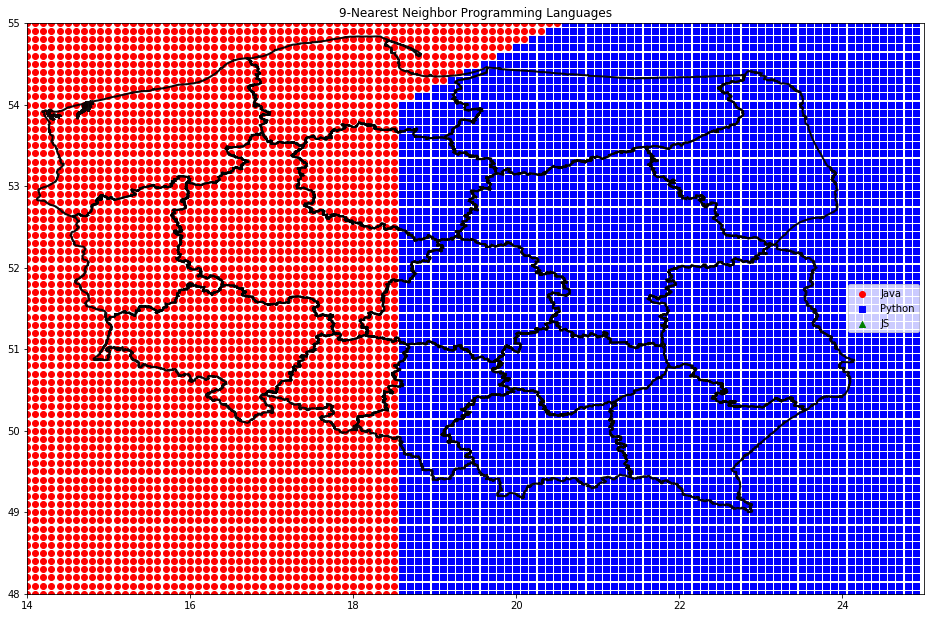

In [10]:
# Points were chosen randomly as I was not able to find any data about favourites programming languages in polish cities.

cities = [(21,52,'Java'),(18,54,'JS'),(23,53,'Python'), (19,51,'Java'), (14,53,'Java'), (22,51,'Python'),(17,51,'JS'),
          (19,50,'Java'), (15,51,'Python'), (17,52.5,'Python')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

def majority_vote(labels):
    """assumes that labels are ordered from nearest to farthest"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     
    else:
        return majority_vote(labels[:-1])


def knn_classify(k, labeled_points, new_point):
    by_distance = sorted(labeled_points,
                         key=lambda point_label: distance(point_label[0], new_point))

    k_nearest_labels = [label for _, label in by_distance[:k]]

    return majority_vote(k_nearest_labels)


def plot_state_borders(plt, color='0.8'):
    eojson = {}
    with open("gadm36_POL_1.json", "r") as f:
        geojson = json.load(f)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    ax = plt.gca() 
    for poly in geojson['geometries']:
        ax.add_patch(PolygonPatch(poly, alpha=15, zorder=10, fill=False, lw=2))
        ax.axis('scaled')

def plot_cities():

    plots = { "Java" : ([], []), "Python" : ([], []), "JS" : ([], []) }

    markers = { "Java" : "o", "Python" : "s", "JS" : "^" }
    colors  = { "Java" : "r", "Python" : "b", "JS" : "g" }

    plot_state_borders(plt)    
    for (longitude, latitude), language in cities:
        plots[language][0].append(longitude)
        plots[language][1].append(latitude)

    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=10, s=200)

    plt.legend(loc=0)
    plt.title("Favorite Programming Languages")
    plt.show()

def classify_and_plot_grid(k=1):
    plots = { "Java" : ([], []), "Python" : ([], []), "JS" : ([], []) }
    markers = { "Java" : "o", "Python" : "s", "JS" : "^" }
    colors  = { "Java" : "r", "Python" : "b", "JS" : "g" }

    for longitude in numpy.arange(13, 25, 0.1):
        for latitude in numpy.arange(48, 56, 0.1):
            predicted_language = knn_classify(k, cities, [longitude, latitude])
            plots[predicted_language][0].append(longitude)
            plots[predicted_language][1].append(latitude)

    # create a scatter series for each language
    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=0)

    plot_state_borders(plt, color='black') 

    plt.legend(loc=0)          
    plt.axis([14,25,48,55])
    plt.title(str(k) + "-Nearest Neighbor Programming Languages")
    plt.show()

plot_cities()
for k in range(1,10):
    classify_and_plot_grid(k)


In [25]:
# SCIKIT-LEARN EXAMPLES - brute and ball_tree algorithms
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

# STANDARD ALGORITHM
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.33)
clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, Y_train)

print("Accuracy: ")
accuracy_score(Y_test, clf.predict(X_test))

Accuracy: 


0.92

In [26]:
accuracy_for_K_neighbors = []
accuracy_for_K_neighbors_ball_tree = []
for k in range(1, X_train.shape[0]):
    clf = KNeighborsClassifier(n_neighbors=k, algorithm='brute').fit(X_train, Y_train)
    clf_ball_tree = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree').fit(X_train, Y_train)
    accuracy_std=accuracy_score(Y_test, clf.predict(X_test))
    accuracy_ball_tree = accuracy_score(Y_test, clf_ball_tree.predict(X_test))
    accuracy_for_K_neighbors.append([k, accuracy_std])
    accuracy_for_K_neighbors_ball_tree.append([k,accuracy_ball_tree])
    

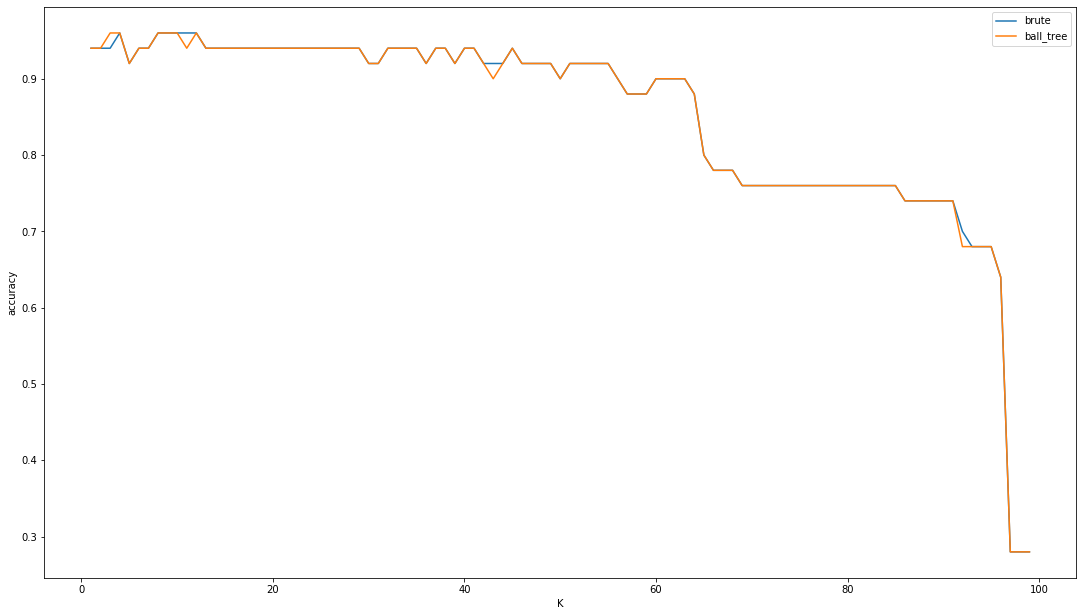

In [27]:
accuracy_for_K_neighbors = numpy.array(accuracy_for_K_neighbors)
accuracy_for_K_neighbors_ball_tree = numpy.array(accuracy_for_K_neighbors_ball_tree)
plt.plot(accuracy_for_K_neighbors[:,0], accuracy_for_K_neighbors[:,1], label='brute')
plt.plot(accuracy_for_K_neighbors_ball_tree[:,0], accuracy_for_K_neighbors_ball_tree[:,1], label='ball_tree')
plt.xlabel("K")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.ylabel("accuracy")
plt.legend()
plt.show()